<a href="https://colab.research.google.com/github/emkafie/Machine-Learning/blob/main/P2_JS09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum 2**

## **Langkah 1**

In [1]:
# ==========================================
# IMPORT LIBRARY
# ==========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# ==========================================
# LANGKAH 1: BUAT DATASET DUMMY
# ==========================================
# Membuat data dummy dengan make_classification
X, y = make_classification(n_samples=30,
                           n_features=2,
                           n_classes=2,
                           n_informative=2,
                           n_redundant=0,
                           n_repeated=0,
                           shuffle=False)

# Preprocessing Data Dummy agar sesuai dengan MultinomialNB
# MultinomialNB tidak bisa menerima nilai negatif (butuh data cacahan/diskrit)
X = np.absolute(X)          # Pastikan nilai positif
X = np.round(X, 2) * 100    # Hilangkan koma (simulasi data diskrit)
X = X.astype(int)           # Ubah ke integer

print("--- Contoh Data Fitur (X) ---")
print(X[:5]) # Menampilkan 5 data pertama
print("\n--- Contoh Label (y) ---")
print(y[:5])

--- Contoh Data Fitur (X) ---
[[ 64 202]
 [175 194]
 [134  50]
 [ 18 103]
 [ 85 142]]

--- Contoh Label (y) ---
[0 0 0 0 0]


## **Langkah 2 & 3**

In [3]:
# ==========================================
# LANGKAH 2 & 3: MEMBUAT DATAFRAME & LABELING
# ==========================================
# Reshape label y menjadi 2D untuk penggabungan
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y
data = np.concatenate((X, y_new), axis=1)

# Buat DataFrame
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']
df = pd.DataFrame(data, columns=nama_kolom)

# Mapping Label agar lebih mudah dibaca (0 -> Kelas B, 1 -> Kelas A)
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}
df_label = df.copy()
df_label['Label'] = df_label['Label'].map(labels)

print("\n--- Head Data Frame ---")
print(df_label.head())


--- Head Data Frame ---
   Fitur 1  Fitur 2    Label
0       64      202  Kelas B
1      175      194  Kelas B
2      134       50  Kelas B
3       18      103  Kelas B
4       85      142  Kelas B


## **Langkah 4**

/tmp/ipython-input-3434495401.py:11: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_a = gb.get_group('Kelas A')
/tmp/ipython-input-3434495401.py:12: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  class_b = gb.get_group('Kelas B')


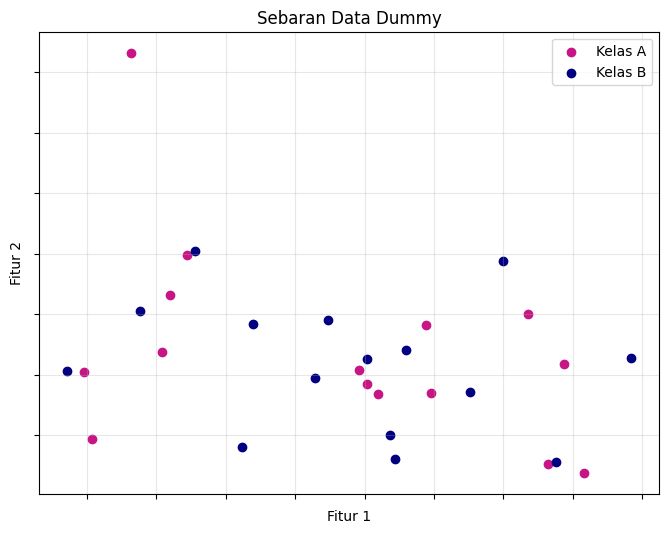

In [4]:
# ==========================================
# LANGKAH 4: VISUALISASI DATA
# ==========================================
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Grouping data berdasarkan label
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'], label='Kelas A')
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'], label='Kelas B')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.title('Sebaran Data Dummy')
plt.legend()
plt.grid(True, alpha=0.3)
# Menghilangkan label tick sesuai instruksi asli
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

## **Langkah 5**

In [5]:
# ==========================================
# LANGKAH 5: MODEL MULTINOMIAL NAIVE BAYES
# ==========================================
# Split data (70% Train, 30% Test)
# Menggunakan random_state=30 agar hasil konsisten dengan panduan
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

# Inisiasi dan latih model Multinomial
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Prediksi
y_train_pred = mnb.predict(X_train)
y_test_pred = mnb.predict(X_test)

# Evaluasi
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print(f'\n--- Hasil Multinomial Naive Bayes ---')
print(f'Akurasi Train : {acc_train}')
print(f'Akurasi Test  : {acc_test}')


--- Hasil Multinomial Naive Bayes ---
Akurasi Train : 0.5238095238095238
Akurasi Test  : 0.4444444444444444


## **Langkah 6**

In [6]:
# ==========================================
# LANGKAH 6: MODEL GAUSSIAN NAIVE BAYES
# ==========================================
# Inisiasi dan latih model Gaussian
# Menggunakan data split yang sama persis dengan Multinomial
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Prediksi
y_train_pred_gnb = gnb.predict(X_train)
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

print(f'\n--- Hasil Gaussian Naive Bayes ---')
print(f'Akurasi Train : {acc_train_gnb}')
print(f'Akurasi Test  : {acc_test_gnb}')


--- Hasil Gaussian Naive Bayes ---
Akurasi Train : 0.6666666666666666
Akurasi Test  : 0.2222222222222222


Analisis Singkat
1. Transformasi Data: Bagian np.absolute dan astype(int) sangat penting karena MultinomialNB sklearn tidak menerima nilai negatif. Model ini berasumsi data adalah count (cacahan), seperti jumlah kata dalam dokumen.

2. Perbedaan Hasil:

    * MultinomialNB bekerja cukup baik karena kita "memaksa" datanya menjadi bentuk integer positif yang seolah-olah adalah data cacahan.

    * GaussianNB biasanya lebih cocok untuk fitur continuous (seperti tinggi badan, suhu, dll). Dalam kasus data dummy ini, karena datanya sintetis dan sedikit (hanya 30 sampel), variasi hasil akurasi sangat dipengaruhi oleh bagaimana train_test_split membagi datanya.